In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_iipr = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/iipr.csv')
df_iipr['Date'] = pd.to_datetime(df_iipr['Date'])
df_iipr = df_iipr.set_index('Date')
df_iipr = df_iipr.rename(columns={'Open':'iipr_Open', 'High':'iipr_High', 'Low':'iipr_Low', 'Close':'iipr_Close', 'Volume':'iipr_Volume'})
df_iipr = df_iipr.drop('Adj Close', axis=1)
df_iipr['iipr_prev_close'] = df_iipr['iipr_Close'].shift(1)
df_iipr['iipr_next_close'] = df_iipr['iipr_Close'].shift(-1)
df_iipr['iipr_diff'] = df_iipr['iipr_Close'].diff()
df_iipr['iipr_%change'] = df_iipr['iipr_Close'].pct_change()
df_iipr['iipr_5day_avg_close'] = df_iipr['iipr_Close'].rolling(5).mean()
df_iipr['iipr_5day_avg_diff'] = df_iipr['iipr_diff'].rolling(5).mean()
df_iipr['iipr_10day_avg_close'] = df_iipr['iipr_Close'].rolling(10).mean()
df_iipr['iipr_10day_avg_diff'] = df_iipr['iipr_diff'].rolling(10).mean()

In [4]:
df_iipr

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-17  134.919998  136.300003  132.227997  136.029999       279800   
2022-05-18  133.449997  134.945999  125.785004  128.110001       299500   
2022-05-19  128.110001  133.570007  128.110001  130.119995       279300   
2022-05-20  131.949997  132.800003  125.885002  131.210007       265100   
2022-05-23  131.550003  131.820007  126.813004  128.990005       195700   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-17       133.160004       128.110001   2.869995      0.021553   
2022-05-18       136.029999       130.119995  -7.919998     -0.058222   
2022-05-19       128.110001       131.210007   2.009994      0.015690   
2022-05-20       130.119995       128.990005   1.090012      0.008377   
2022-05-23       131.210007              NaN  -2.220002     -0.016919   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17           131.496001            1.484000            133.981001   
2022-05-18           132.534001            1.038001            131.919001   
2022-05-19           133.178000            0.643999            130.870001   
2022-05-20           131.726001           -1.451999            130.591001   
2022-05-23           130.892001           -0.834000            130.452001   

            iipr_10day_avg_diff  
Date                             
2016-12-01                  NaN  
2016-12-02                  NaN  
2016-12-05                  NaN  
2016-12-06                  NaN  
2016-12-07                  NaN  
...                         ...  
2022-05-17            -0.856000  
2022-05-18            -2.061999  
2022-05-19            -1.049001  
2022-05-20            -0.278999  
2022-05-23            -0.139000  

[1378 rows x 13 columns]

In [5]:
cut = df_iipr.index.min()
cut

Timestamp('2016-12-01 00:00:00')

Text(0.5, 0, 'IIPR Close')

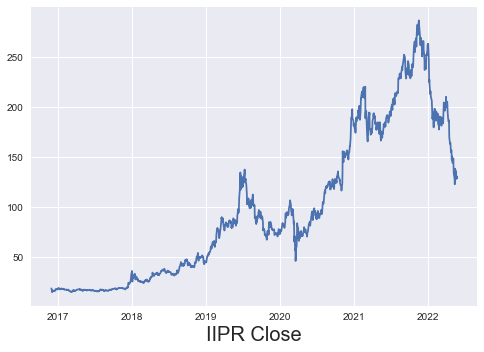

In [6]:
plt.plot(df_iipr['iipr_Close'])
plt.xlabel('IIPR Close', fontsize=20)

## IIPR and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_iipr, df_dow, on='Date', how='left')
df0

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-17  134.919998  136.300003  132.227997  136.029999       279800   
2022-05-18  133.449997  134.945999  125.785004  128.110001       299500   
2022-05-19  128.110001  133.570007  128.110001  130.119995       279300   
2022-05-20  131.949997  132.800003  125.885002  131.210007       265100   
2022-05-23  131.550003  131.820007  126.813004  128.990005       195700   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-17       133.160004       128.110001   2.869995      0.021553   
2022-05-18       136.029999       130.119995  -7.919998     -0.058222   
2022-05-19       128.110001       131.210007   2.009994      0.015690   
2022-05-20       130.119995       128.990005   1.090012      0.008377   
2022-05-23       131.210007              NaN  -2.220002     -0.016919   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17           131.496001            1.484000            133.981001   
2022-05-18           132.534001            1.038001            131.919001   
2022-05-19           133.178000            0.643999            130.870001   
2022-05-20           131.726001           -1.451999            130.591001   
2022-05-23           130.892001           -0.834000            130.452001   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                  NaN   19149.20   19214.30  19138.79    19191.93   
2016-12-02                  NaN   19161.25   19196.14  19141.18    19170.42   
2016-12-05                  NaN   19244.35   19274.85  19186.73    19216.24   
2016-12-06                  NaN   19219.91   19255.89  19184.74    19251.78   
2016-12-07                  NaN   19241.99   19558.42  19229.83    19549.62   
...                         ...        ...        ...       ...         ...   
2022-05-17            -0.856000   32427.00   32689.14  32308.15    32654.59   
2022-05-18            -2.061999   32468.67   32468.67  31393.95    31490.07   
2022-05-19            -1.049001   31262.62   31569.13  31016.41    31253.13   
2022-05-20            -0.278999   31426.94   31515.78  30635.76    31261.90   
2022-05-23            -0.139000   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close

In [9]:
df_isna0 = df0.isna()
df_isna0

iipr_Open  iipr_High  iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                  
2016-12-01      False      False     False       False        False   
2016-12-02      False      False     False       False        False   
2016-12-05      False      False     False       False        False   
2016-12-06      False      False     False       False        False   
2016-12-07      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01             True            False       True          True   
2016-12-02            False            False      False         False   
2016-12-05            False            False      False         False   
2016-12-06            False            False      False         False   
2016-12-07            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                 True                True                  True   
2016-12-02                 True                True                  True   
2016-12-05                 True                True                  True   
2016-12-06                 True                True                  True   
2016-12-07                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                 True      False      False     False       False   
2016-12-02                 True      False      False     False       False   
2016-12-05                 True      False      False     False       False   
2016-12-06                 True      False      False     False       False   
2016-12-07                 True      False      False     False       False   
...                         ...        ...        ...       ...         ...   
2022-05-17                False      False      False     False       False   
2022-05-18                False      False      False     False       False   
2022-05-19                False      False      False     False       False   
2022-05-20                False      False      False     False       False   
2022-05-23                False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

iipr_Open  iipr_High   iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                   
2016-12-01  20.250000  20.520000  19.000000   19.150000      1191200   
2016-12-02  19.190001  19.500000  18.280001   18.450001       299400   
2016-12-05  18.450001  18.670000  14.500000   15.400000       917000   
2016-12-06  15.940000  16.954000  15.450000   16.650000       346200   
2016-12-07  17.610001  17.610001  16.650000   16.889999       244500   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                0.000                 0.0                   0.0   
2016-12-02                0.000                 0.0                   0.0   
2016-12-05                0.000                 0.0                   0.0   
2016-12-06                0.000                 0.0                   0.0   
2016-12-07               17.308                 0.0                   0.0   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                  0.0   19149.20   19214.30  19138.79    19191.93   
2016-12-02                  0.0   19161.25   19196.14  19141.18    19170.42   
2016-12-05                  0.0   19244.35   19274.85  19186.73    19216.24   
2016-12-06                  0.0   19219.91   19255.89  19184.74    19251.78   
2016-12-07                  0.0   19241.99   19558.42  19229.83    19549.62   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2016-12-01  108764514.0         19123.58         19170.42      68.35   
2016-12-02   84910694.0         19191.93         19216.24     -21.51   
2016-12-05  317712916.0         19170.42         19251.78      45.82   
2016-12-06  284878477.0         19216.24         19549.62      35.54   
2016-12-07  385286100.0         19251.78         19614.81     297.84   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2016-12-01      0.003574            19137.430              21.750   
2016-12-02     -0.001121            19141.086               3.656   
2016-12-05      0.002390            19164.754              23.668   
2016-12-06      0.001849            19190.790              26.036   
2016-12-07      0.015471            19275.998              85.208   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2016-12-01             19052.264               32.379  
2016-12-02             19078.924               26.660  
2016-12-05             19113.755               34.831  
2016-12-06             19143.264               29.509  
2016-12-07             19195.839               52.575

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-17  134.919998  136.300003  132.227997  136.029999       279800   
2022-05-18  133.449997  134.945999  125.785004  128.110001       299500   
2022-05-19  128.110001  133.570007  128.110001  130.119995       279300   
2022-05-20  131.949997  132.800003  125.885002  131.210007       265100   
2022-05-23  131.550003  131.820007  126.813004  128.990005       195700   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-17       133.160004       128.110001   2.869995      0.021553   
2022-05-18       136.029999       130.119995  -7.919998     -0.058222   
2022-05-19       128.110001       131.210007   2.009994      0.015690   
2022-05-20       130.119995       128.990005   1.090012      0.008377   
2022-05-23       131.210007         0.000000  -2.220002     -0.016919   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01             0.000000            0.000000              0.000000   
2016-12-02             0.000000            0.000000              0.000000   
2016-12-05             0.000000            0.000000              0.000000   
2016-12-06             0.000000            0.000000              0.000000   
2016-12-07            17.308000            0.000000              0.000000   
...                         ...                 ...                   ...   
2022-05-17           131.496001            1.484000            133.981001   
2022-05-18           132.534001            1.038001            131.919001   
2022-05-19           133.178000            0.643999            130.870001   
2022-05-20           131.726001           -1.451999            130.591001   
2022-05-23           130.892001           -0.834000            130.452001   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01             0.000000   19149.20   19214.30  19138.79    19191.93   
2016-12-02             0.000000   19161.25   19196.14  19141.18    19170.42   
2016-12-05             0.000000   19244.35   19274.85  19186.73    19216.24   
2016-12-06             0.000000   19219.91   19255.89  19184.74    19251.78   
2016-12-07             0.000000   19241.99   19558.42  19229.83    19549.62   
...                         ...        ...        ...       ...         ...   
2022-05-17            -0.856000   32427.00   32689.14  32308.15    32654.59   
2022-05-18            -2.061999   32468.67   32468.67  31393.95    31490.07   
2022-05-19            -1.049001   31262.62   31569.13  31016.41    31253.13   
2022-05-20            -0.278999   31426.94   31515.78  30635.76    31261.90   
2022-05-23            -0.139000   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'iipr_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000  20.520000  19.000000   
2016-12-02     12    2  2016        4  19.190001  19.500000  18.280001   
2016-12-05     12    5  2016        4  18.450001  18.670000  14.500000   
2016-12-06     12    6  2016        4  15.940000  16.954000  15.450000   
2016-12-07     12    7  2016        4  17.610001  17.610001  16.650000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_next_close  \
Date                                                                    
2016-12-01   19.150000      1191200         0.000000        18.450001   
2016-12-02   18.450001       299400        19.150000        15.400000   
2016-12-05   15.400000       917000        18.450001        16.650000   
2016-12-06   16.650000       346200        15.400000        16.889999   
2016-12-07   16.889999       244500        16.650000        17.200001   

            iipr_diff  iipr_%change  iipr_5day_avg_close  iipr_5day_avg_diff  \
Date                                                                           
2016-12-01   0.000000      0.000000                0.000                 0.0   
2016-12-02  -0.699999     -0.036553                0.000                 0.0   
2016-12-05  -3.050001     -0.165312                0.000                 0.0   
2016-12-06   1.250000      0.081169                0.000                 0.0   
2016-12-07   0.239999      0.014414               17.308                 0.0   

            iipr_10day_avg_close  iipr_10day_avg_diff  djix_Open  djix_High  \
Date                                                                          
2016-12-01                   0.0                  0.0   19149.20   19214.30   
2016-12-02                   0.0                  0.0   19161.25   19196.14   
2016-12-05                   0.0                  0.0   19244.35   19274.85   
2016-12-06                   0.0                  0.0   19219.91   19255.89   
2016-12-07                   0.0                  0.0   19241.99   19558.42   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2016-12-01  19138.79    19191.93  108764514.0         19123.58   
2016-12-02  19141.18    19170.42   84910694.0         19191.93   
2016-12-05  19186.73    19216.24  317712916.0         19170.42   
2016-12-06  19184.74    19251.78  284878477.0         19216.24   
2016-12-07  19229.83    19549.62  385286100.0         19251.78   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2016-12-01         19170.42      68.35      0.003574            19137.430   
2016-12-02         19216.24     -21.51     -0.001121            19141.086   
2016-12-05         19251.78      45.82      0.002390            19164.754   
2016-12-06         19549.62      35.54      0.001849            19190.790   
2016-12-07         19614.81     297.84      0.015471            19275.998   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2016-12-01              21.750             19052.264               32.379   
2016-12-02               3.656             19078.924               26.660   
2016-12-05              23.668             19113.755               34.831   
2016-12-06              26.036             19143.264               29.509   
2016-12-07              85.208             19195.839               52.575   

            iipr_Open_b  iipr_High_b  iipr_Low_b  iipr_Close_b  iipr_Volume_b  \
Date                                                                            
2016-12-01        False        False       False         False          False   
2016-12-02        False        False       False         False          False   

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(1377, 56)

In [18]:
n = int(len(df0) * 0.9)
n

1239

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

1239
138


In [21]:
X_train0 = train0.drop('iipr_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000      20.52  19.000000   
2016-12-02     12    2  2016        4  19.190001      19.50  18.280001   
2016-12-05     12    5  2016        4  18.450001      18.67  14.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2016-12-01   19.150000      1191200         0.000000   0.000000      0.000000   
2016-12-02   18.450001       299400        19.150000  -0.699999     -0.036553   
2016-12-05   15.400000       917000        18.450001  -3.050001     -0.165312   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2016-12-01                  0.0   19149.20   19214.30  19138.79    19191.93   
2016-12-02                  0.0   19161.25   19196.14  19141.18    19170.42   
2016-12-05                  0.0   19244.35   19274.85  19186.73    19216.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2016-12-01  108764514.0         19123.58         19170.42      68.35   
2016-12-02   84910694.0         19191.93         19216.24     -21.51   
2016-12-05  317712916.0         19170.42         19251.78      45.82   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2016-12-01      0.003574            19137.430              21.750   
2016-12-02     -0.001121            19141.086               3.656   
2016-12-05      0.002390            19164.754              23.668   

            djix_10day_avg_close  djix_10day_avg_diff  iipr_Open_b  \
Date                                                                 
2016-12-01             19052.264               32.379        False   
2016-12-02             19078.924               26.660        False   
2016-12-05             19113.755               34.831        False   

            iipr_High_b  iipr_Low_b  iipr_Close_b  iipr_Volume_b  \
Date                                                               
2016-12-01        False       False         False          False   
2016-12-02        False       False         False          False   
2016-12-05        False       False         False          False   

            iipr_prev_close_b  iipr_next_close_b  iipr_diff_b  iipr_%change_b  \
Date                                                                            
2016-12-01               True              False         True            True   
2016-12-02              False              False        False           False   
2016-12-05              False              False        False           False   

            iipr_5day_avg_close_b  iipr_5day_avg_diff_b  \
Date                                                      
2016-12-01                   True                  True   
2016-12-02                   True                  True   
2016-12-05                   True                  True   

            iipr_10day_avg_close_b  iipr_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2016-12-01                    True                   True        False   
2016-12-02                    True                   True        False   
2016-12-05                    True                   Tru

In [22]:
X_train0.shape

(1239, 55)

In [23]:
y_train0 = train0['iipr_next_close']
y_train0.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-10-29    268.450012
2021-11-01    266.359985
2021-11-02    260.070007
Name: iipr_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('iipr_next_close', axis=1)
y_test0 = test0['iipr_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2021-11-03     11    3  2021        4  268.000000  268.000000  258.179993   
2021-11-04     11    4  2021        4  264.970001  274.000000  262.809998   
2021-11-05     11    5  2021        4  270.850006  275.980011  268.980988   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2021-11-03  260.070007       198200       266.359985  -6.289978     -0.023615   
2021-11-04  267.679993       264700       260.070007   7.609986      0.029261   
2021-11-05  274.420013       197200       267.679993   6.740020      0.025179   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2021-11-03           263.894000            1.082001            262.044000   
2021-11-04           265.129999            1.235999            263.142999   
2021-11-05           267.396002            2.266003            264.614001   

            iipr_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                          
2021-11-03             0.739001   36059.09   36178.51  35891.73    36157.58   
2021-11-04             1.098999   36107.46   36168.03  35986.48    36124.23   
2021-11-05             1.471002   36268.75   36484.75  36190.20    36327.95   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-11-03  320354913.0         36052.63         36124.23     104.95   
2021-11-04  361561660.0         36157.58         36327.95     -33.35   
2021-11-05  534285391.0         36124.23         36432.22     203.72   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-11-03      0.002911            35934.818             133.378   
2021-11-04     -0.000922            36013.568              78.750   
2021-11-05      0.005639            36115.246             101.678   

            djix_10day_avg_close  djix_10day_avg_diff  iipr_Open_b  \
Date                                                                 
2021-11-03             35794.291               54.824        False   
2021-11-04             35846.406               52.115        False   
2021-11-05             35911.499               65.093        False   

            iipr_High_b  iipr_Low_b  iipr_Close_b  iipr_Volume_b  \
Date                                                               
2021-11-03        False       False         False          False   
2021-11-04        False       False         False          False   
2021-11-05        False       False         False          False   

            iipr_prev_close_b  iipr_next_close_b  iipr_diff_b  iipr_%change_b  \
Date                                                                            
2021-11-03              False              False        False           False   
2021-11-04              False              False        False           False   
2021-11-05              False              False        False           False   

            iipr_5day_avg_close_b  iipr_5day_avg_diff_b  \
Date                                                      
2021-11-03                  False                 False   
2021-11-04                  False                 False   
2021-11-05                  False                 False   

            iipr_10day_avg_close_b  iipr_10day_avg_diff_b  djix_Open_b  \
Date                                                                     
2021-11-03                   False                  False        False   
2021-11-04                   False                  False        False   
2021-11-05                   False       

In [27]:
X_test0.shape

(138, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    130.119995
2022-05-19    131.210007
2022-05-20    128.990005
Name: iipr_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([259.83658199, 269.34143192, 274.55410652, 281.42312813,
       279.49475845])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

5.107221255760969


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

4.16023369230357


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['iipr_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['iipr_next_close'])

In [35]:
y_test0['iipr_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-16       136.029999            136.083362
2022-05-17       128.110001            132.256934
2022-05-18       130.119995            129.187494
2022-05-19       131.210007            132.390218
2022-05-20       128.990005            134.334104

In [37]:
hyper_table.append(dict(stock='iipr', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['iipr_next_close'][-1],
                        predicted_price=y_test0['iipr_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

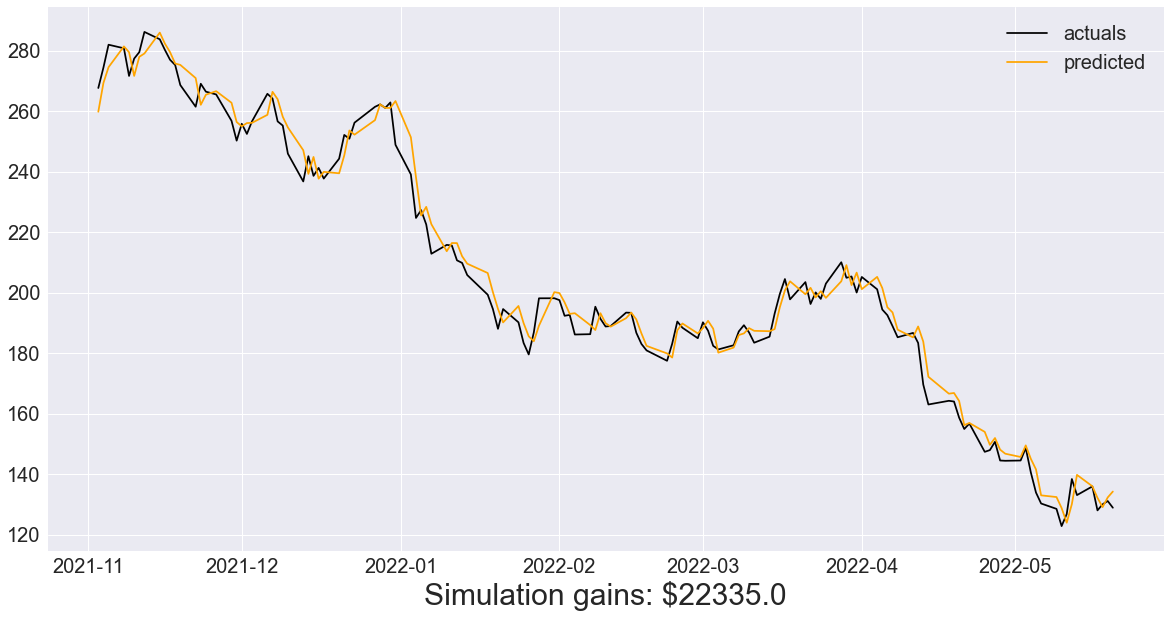

In [230]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['iipr_next_close'], color='black')
ax.plot(y_test0['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.xlabel('Simulation gains: $' + str(round(total_gains, 2)), fontsize=30)
plt.show()

## IIPR and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_iipr, df_etfs, on='Date', how='left')
df1

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-17  134.919998  136.300003  132.227997  136.029999       279800   
2022-05-18  133.449997  134.945999  125.785004  128.110001       299500   
2022-05-19  128.110001  133.570007  128.110001  130.119995       279300   
2022-05-20  131.949997  132.800003  125.885002  131.210007       265100   
2022-05-23  131.550003  131.820007  126.813004  128.990005       195700   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-17       133.160004       128.110001   2.869995      0.021553   
2022-05-18       136.029999       130.119995  -7.919998     -0.058222   
2022-05-19       128.110001       131.210007   2.009994      0.015690   
2022-05-20       130.119995       128.990005   1.090012      0.008377   
2022-05-23       131.210007              NaN  -2.220002     -0.016919   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17           131.496001            1.484000            133.981001   
2022-05-18           132.534001            1.038001            131.919001   
2022-05-19           133.178000            0.643999            130.870001   
2022-05-20           131.726001           -1.451999            130.591001   
2022-05-23           130.892001           -0.834000            130.452001   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  NaN  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  NaN  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  NaN  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-17            -0.856000   7.990000   8.170000   7.880000   8.100000   
2022-05-18            -2.061999   7.940000   8.030000   7.605000   7.620000   
2022-05-19            -1.049001   7.560000   7.860000   7.540000   7.780000   
2022-05-20            -0.278999   7.860000   7.860000   7.420000   7.600000   
2022-05-23            -0.139000   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [41]:
df_isna1 = df1.isna()
df_isna1

iipr_Open  iipr_High  iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                  
2016-12-01      False      False     False       False        False   
2016-12-02      False      False     False       False        False   
2016-12-05      False      False     False       False        False   
2016-12-06      False      False     False       False        False   
2016-12-07      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01             True            False       True          True   
2016-12-02            False            False      False         False   
2016-12-05            False            False      False         False   
2016-12-06            False            False      False         False   
2016-12-07            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                 True                True                  True   
2016-12-02                 True                True                  True   
2016-12-05                 True                True                  True   
2016-12-06                 True                True                  True   
2016-12-07                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2016-12-01                 True    False    False   False     False   
2016-12-02                 True    False    False   False     False   
2016-12-05                 True    False    False   False     False   
2016-12-06                 True    False    False   False     False   
2016-12-07                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-17                False    False    False   False     False   
2022-05-18                False    False    False   False     False   
2022-05-19                False    False    False   False     False   
2022-05-20                False    False    False   False     False   
2022-05-23                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2016-12-01      False          False          False    False

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

iipr_Open  iipr_High   iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                   
2016-12-01  20.250000  20.520000  19.000000   19.150000      1191200   
2016-12-02  19.190001  19.500000  18.280001   18.450001       299400   
2016-12-05  18.450001  18.670000  14.500000   15.400000       917000   
2016-12-06  15.940000  16.954000  15.450000   16.650000       346200   
2016-12-07  17.610001  17.610001  16.650000   16.889999       244500   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                0.000                 0.0                   0.0   
2016-12-02                0.000                 0.0                   0.0   
2016-12-05                0.000                 0.0                   0.0   
2016-12-06                0.000                 0.0                   0.0   
2016-12-07               17.308                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  0.0  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  0.0  27.790001  27.790001  27.749001  27.749001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   
2016-12-06        800      27.212999      27.749001  0.046002    0.001690   
2016-12-07       1200      27.259001      27.930000  0.490000    0.017976   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01          27.427800           -0.1194             27.5086   
2016-12-02          27.308400           -0.1194             27.4265   
2016-12-05          27.256400           -0.0520             27.4038   
2016-12-06          27.213600           -0.0428             27.3634   
2016-12-07          27.221401            0.0078             27.3843   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   
2016-12-06            -0.0404        0.0        0.0       0.0         0.0   
2016-12-07             0.0209        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0            

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-17  134.919998  136.300003  132.227997  136.029999       279800   
2022-05-18  133.449997  134.945999  125.785004  128.110001       299500   
2022-05-19  128.110001  133.570007  128.110001  130.119995       279300   
2022-05-20  131.949997  132.800003  125.885002  131.210007       265100   
2022-05-23  131.550003  131.820007  126.813004  128.990005       195700   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-17       133.160004       128.110001   2.869995      0.021553   
2022-05-18       136.029999       130.119995  -7.919998     -0.058222   
2022-05-19       128.110001       131.210007   2.009994      0.015690   
2022-05-20       130.119995       128.990005   1.090012      0.008377   
2022-05-23       131.210007         0.000000  -2.220002     -0.016919   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01             0.000000            0.000000              0.000000   
2016-12-02             0.000000            0.000000              0.000000   
2016-12-05             0.000000            0.000000              0.000000   
2016-12-06             0.000000            0.000000              0.000000   
2016-12-07            17.308000            0.000000              0.000000   
...                         ...                 ...                   ...   
2022-05-17           131.496001            1.484000            133.981001   
2022-05-18           132.534001            1.038001            131.919001   
2022-05-19           133.178000            0.643999            130.870001   
2022-05-20           131.726001           -1.451999            130.591001   
2022-05-23           130.892001           -0.834000            130.452001   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-02             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-05             0.000000  27.190001  27.212999  26.219999  27.212999   
2016-12-06             0.000000  27.289000  27.289000  27.259001  27.259001   
2016-12-07             0.000000  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-17            -0.856000   7.990000   8.170000   7.880000   8.100000   
2022-05-18            -2.061999   7.940000   8.030000   7.605000   7.620000   
2022-05-19            -1.049001   7.560000   7.860000   7.540000   7.780000   
2022-05-20            -0.278999   7.860000   7.860000   7.420000   7.600000   
2022-05-23            -0.139000   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'iipr_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2016-12-01     12    1  2016        4   20.250000   20.520000   19.000000   
2016-12-02     12    2  2016        4   19.190001   19.500000   18.280001   
2016-12-05     12    5  2016        4   18.450001   18.670000   14.500000   
2016-12-06     12    6  2016        4   15.940000   16.954000   15.450000   
2016-12-07     12    7  2016        4   17.610001   17.610001   16.650000   
...           ...  ...   ...      ...         ...         ...         ...   
2022-05-17      5   17  2022        2  134.919998  136.300003  132.227997   
2022-05-18      5   18  2022        2  133.449997  134.945999  125.785004   
2022-05-19      5   19  2022        2  128.110001  133.570007  128.110001   
2022-05-20      5   20  2022        2  131.949997  132.800003  125.885002   
2022-05-23      5   23  2022        2  131.550003  131.820007  126.813004   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_next_close  \
Date                                                                    
2016-12-01   19.150000      1191200         0.000000        18.450001   
2016-12-02   18.450001       299400        19.150000        15.400000   
2016-12-05   15.400000       917000        18.450001        16.650000   
2016-12-06   16.650000       346200        15.400000        16.889999   
2016-12-07   16.889999       244500        16.650000        17.200001   
...                ...          ...              ...              ...   
2022-05-17  136.029999       279800       133.160004       128.110001   
2022-05-18  128.110001       299500       136.029999       130.119995   
2022-05-19  130.119995       279300       128.110001       131.210007   
2022-05-20  131.210007       265100       130.119995       128.990005   
2022-05-23  128.990005       195700       131.210007         0.000000   

            iipr_diff  iipr_%change  iipr_5day_avg_close  iipr_5day_avg_diff  \
Date                                                                           
2016-12-01   0.000000      0.000000             0.000000            0.000000   
2016-12-02  -0.699999     -0.036553             0.000000            0.000000   
2016-12-05  -3.050001     -0.165312             0.000000            0.000000   
2016-12-06   1.250000      0.081169             0.000000            0.000000   
2016-12-07   0.239999      0.014414            17.308000            0.000000   
...               ...           ...                  ...                 ...   
2022-05-17   2.869995      0.021553           131.496001            1.484000   
2022-05-18  -7.919998     -0.058222           132.534001            1.038001   
2022-05-19   2.009994      0.015690           133.178000            0.643999   
2022-05-20   1.090012      0.008377           131.726001           -1.451999   
2022-05-23  -2.220002     -0.016919           130.892001           -0.834000   

            iipr_10day_avg_close  iipr_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2016-12-01              0.000000             0.000000  26.943001  26.943001   
2016-12-02              0.000000             0.000000  26.943001  26.943001   
2016-12-05              0.000000             0.000000  27.190001  27.212999   
2016-12-06              0.000000             0.000000  27.289000  27.289000   
2016-12-07              0.000000             0.000000  27.790001  27.790001   
...                          ...                  ...        ...        ...   
2022-05-17            133.981001            -0.856000   7.990000   8.170000   
2022-05-18            131.919001            -2.061999   7.940000   8.030000   
2022-05-19            130.870001            -1.049001   7.560000   7.860000   
2022-05-20            130.591001            -0.278999   7.860000   7.860000   
2022-05-23            130.452001            -0.139000   7.620000   7.64

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

1239

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

1239
138


In [52]:
X_train1 = train1.drop('iipr_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000      20.52  19.000000   
2016-12-02     12    2  2016        4  19.190001      19.50  18.280001   
2016-12-05     12    5  2016        4  18.450001      18.67  14.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2016-12-01   19.150000      1191200         0.000000   0.000000      0.000000   
2016-12-02   18.450001       299400        19.150000  -0.699999     -0.036553   
2016-12-05   15.400000       917000        18.450001  -3.050001     -0.165312   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01            27.4278           -0.1194             27.5086   
2016-12-02            27.3084           -0.1194             27.4265   
2016-12-05            27.2564           -0.0520             27.4038   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2016-12-01           0.0                  0.0                 0.0   
2016-12-02           0.0                  0.0                 0.0   
2016-12-05           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2016-12-01                   0.0                  0.0        0.0        0.0   
2016-12-02                   0.0                  0.0        0.0        0.0   
2016-12-05                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2016-12-01       0.0         0.0          0.0              0.0   
2016-12-02       0.0    

In [53]:
X_train1.shape

(1239, 159)

In [54]:
y_train1 = train1['iipr_next_close']
y_train1.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-10-29    268.450012
2021-11-01    266.359985
2021-11-02    260.070007
Name: iipr_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('iipr_next_close', axis=1)
y_test1 = test1['iipr_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2021-11-03     11    3  2021        4  268.000000  268.000000  258.179993   
2021-11-04     11    4  2021        4  264.970001  274.000000  262.809998   
2021-11-05     11    5  2021        4  270.850006  275.980011  268.980988   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2021-11-03  260.070007       198200       266.359985  -6.289978     -0.023615   
2021-11-04  267.679993       264700       260.070007   7.609986      0.029261   
2021-11-05  274.420013       197200       267.679993   6.740020      0.025179   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2021-11-03           263.894000            1.082001            262.044000   
2021-11-04           265.129999            1.235999            263.142999   
2021-11-05           267.396002            2.266003            264.614001   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-11-03             0.739001    13.77   14.260  13.730     14.13   
2021-11-04             1.098999    14.15   14.220  13.873     13.93   
2021-11-05             1.471002    13.89   13.935  13.540     13.87   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-11-03    1430300          13.81          13.93     0.32    0.023172   
2021-11-04     914300          14.13          13.87    -0.20   -0.014154   
2021-11-05    1769000          13.93          14.91    -0.06   -0.004307   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-11-03             13.824             0.102              13.991   
2021-11-04             13.854             0.030              13.920   
2021-11-05             13.934             0.080              13.886   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-11-03             -0.050  26.799999  26.799999  26.200001   26.510000   
2021-11-04             -0.071  26.700001  26.700001  25.700001   25.700001   
2021-11-05             -0.034  26.190001  28.690001  25.750000   28.150000   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-11-03    1313600.0        26.879999        25.700001  -0.369999   
2021-11-04    1714900.0        26.510000        28.150000  -0.809999   
2021-11-05    3618300.0        25.700001        29.990000   2.449999   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-11-03     -0.013765                27.07               -0.11   
2021-11-04     -0.030554                26.77               -0.30   
2021-11-05      0.095331                26.98                0.21   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-11-03                27.629               -0.306      14.99     15.130   
2021-11-04                27.263               -0.366      14.99     15.180   
2021-11-05                27.236               -0.027      14.87     15.623   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-11-03     14.81       15.00     120700.0            15.06   
2021-11-04     14.80       14.84     160500.0    

In [58]:
X_test1.shape

(138, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    130.119995
2022-05-19    131.210007
2022-05-20    128.990005
Name: iipr_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([259.62110956, 274.66345409, 278.06590838, 278.87084767,
       279.25115394])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

5.676928189613404


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

4.602044511305099


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['iipr_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['iipr_next_close'])

In [65]:
y_test1['iipr_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-16       136.029999            136.608579
2022-05-17       128.110001            138.446252
2022-05-18       130.119995            134.574222
2022-05-19       131.210007            134.051270
2022-05-20       128.990005            130.806100

In [67]:
hyper_table.append(dict(stock='iipr', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['iipr_next_close'][-1],
                        predicted_price=y_test1['iipr_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

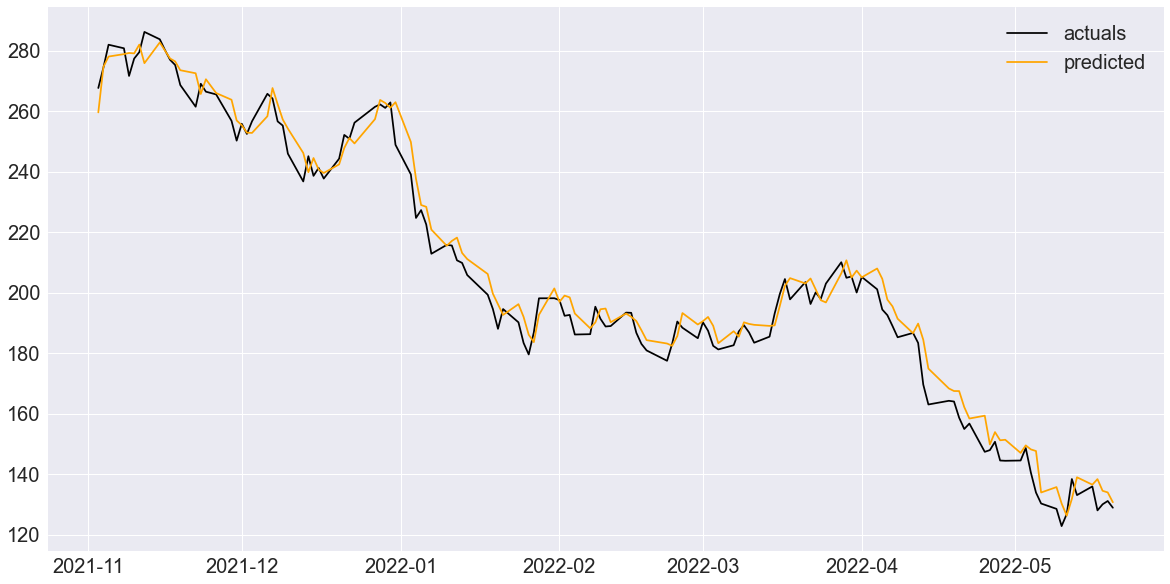

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['iipr_next_close'], color='black')
ax.plot(y_test1['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## IIPR, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_iipr, df_etfs_dow, on='Date', how='left')
df2

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-17  134.919998  136.300003  132.227997  136.029999       279800   
2022-05-18  133.449997  134.945999  125.785004  128.110001       299500   
2022-05-19  128.110001  133.570007  128.110001  130.119995       279300   
2022-05-20  131.949997  132.800003  125.885002  131.210007       265100   
2022-05-23  131.550003  131.820007  126.813004  128.990005       195700   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01              NaN        18.450001        NaN           NaN   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-17       133.160004       128.110001   2.869995      0.021553   
2022-05-18       136.029999       130.119995  -7.919998     -0.058222   
2022-05-19       128.110001       131.210007   2.009994      0.015690   
2022-05-20       130.119995       128.990005   1.090012      0.008377   
2022-05-23       131.210007              NaN  -2.220002     -0.016919   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  NaN                 NaN                   NaN   
2016-12-02                  NaN                 NaN                   NaN   
2016-12-05                  NaN                 NaN                   NaN   
2016-12-06                  NaN                 NaN                   NaN   
2016-12-07            17.308000                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-17           131.496001            1.484000            133.981001   
2022-05-18           132.534001            1.038001            131.919001   
2022-05-19           133.178000            0.643999            130.870001   
2022-05-20           131.726001           -1.451999            130.591001   
2022-05-23           130.892001           -0.834000            130.452001   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  NaN  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  NaN  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  NaN  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  NaN  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-17            -0.856000   7.990000   8.170000   7.880000   8.100000   
2022-05-18            -2.061999   7.940000   8.030000   7.605000   7.620000   
2022-05-19            -1.049001   7.560000   7.860000   7.540000   7.780000   
2022-05-20            -0.278999   7.860000   7.860000   7.420000   7.600000   
2022-05-23            -0.139000   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [71]:
df_isna2 = df2.isna()
df_isna2

iipr_Open  iipr_High  iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                  
2016-12-01      False      False     False       False        False   
2016-12-02      False      False     False       False        False   
2016-12-05      False      False     False       False        False   
2016-12-06      False      False     False       False        False   
2016-12-07      False      False     False       False        False   
...               ...        ...       ...         ...          ...   
2022-05-17      False      False     False       False        False   
2022-05-18      False      False     False       False        False   
2022-05-19      False      False     False       False        False   
2022-05-20      False      False     False       False        False   
2022-05-23      False      False     False       False        False   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01             True            False       True          True   
2016-12-02            False            False      False         False   
2016-12-05            False            False      False         False   
2016-12-06            False            False      False         False   
2016-12-07            False            False      False         False   
...                     ...              ...        ...           ...   
2022-05-17            False            False      False         False   
2022-05-18            False            False      False         False   
2022-05-19            False            False      False         False   
2022-05-20            False            False      False         False   
2022-05-23            False             True      False         False   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                 True                True                  True   
2016-12-02                 True                True                  True   
2016-12-05                 True                True                  True   
2016-12-06                 True                True                  True   
2016-12-07                False                True                  True   
...                         ...                 ...                   ...   
2022-05-17                False               False                 False   
2022-05-18                False               False                 False   
2022-05-19                False               False                 False   
2022-05-20                False               False                 False   
2022-05-23                False               False                 False   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2016-12-01                 True    False    False   False     False   
2016-12-02                 True    False    False   False     False   
2016-12-05                 True    False    False   False     False   
2016-12-06                 True    False    False   False     False   
2016-12-07                 True    False    False   False     False   
...                         ...      ...      ...     ...       ...   
2022-05-17                False    False    False   False     False   
2022-05-18                False    False    False   False     False   
2022-05-19                False    False    False   False     False   
2022-05-20                False    False    False   False     False   
2022-05-23                False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2016-12-01      False          False          False    False

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

iipr_Open  iipr_High   iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                   
2016-12-01  20.250000  20.520000  19.000000   19.150000      1191200   
2016-12-02  19.190001  19.500000  18.280001   18.450001       299400   
2016-12-05  18.450001  18.670000  14.500000   15.400000       917000   
2016-12-06  15.940000  16.954000  15.450000   16.650000       346200   
2016-12-07  17.610001  17.610001  16.650000   16.889999       244500   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                0.000                 0.0                   0.0   
2016-12-02                0.000                 0.0                   0.0   
2016-12-05                0.000                 0.0                   0.0   
2016-12-06                0.000                 0.0                   0.0   
2016-12-07               17.308                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   
2016-12-06                  0.0  27.289000  27.289000  27.259001  27.259001   
2016-12-07                  0.0  27.790001  27.790001  27.749001  27.749001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   
2016-12-06        800      27.212999      27.749001  0.046002    0.001690   
2016-12-07       1200      27.259001      27.930000  0.490000    0.017976   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01          27.427800           -0.1194             27.5086   
2016-12-02          27.308400           -0.1194             27.4265   
2016-12-05          27.256400           -0.0520             27.4038   
2016-12-06          27.213600           -0.0428             27.3634   
2016-12-07          27.221401            0.0078             27.3843   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   
2016-12-06            -0.0404        0.0        0.0       0.0         0.0   
2016-12-07             0.0209        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0            

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

iipr_Open   iipr_High    iipr_Low  iipr_Close  iipr_Volume  \
Date                                                                      
2016-12-01   20.250000   20.520000   19.000000   19.150000      1191200   
2016-12-02   19.190001   19.500000   18.280001   18.450001       299400   
2016-12-05   18.450001   18.670000   14.500000   15.400000       917000   
2016-12-06   15.940000   16.954000   15.450000   16.650000       346200   
2016-12-07   17.610001   17.610001   16.650000   16.889999       244500   
...                ...         ...         ...         ...          ...   
2022-05-17  134.919998  136.300003  132.227997  136.029999       279800   
2022-05-18  133.449997  134.945999  125.785004  128.110001       299500   
2022-05-19  128.110001  133.570007  128.110001  130.119995       279300   
2022-05-20  131.949997  132.800003  125.885002  131.210007       265100   
2022-05-23  131.550003  131.820007  126.813004  128.990005       195700   

            iipr_prev_close  iipr_next_close  iipr_diff  iipr_%change  \
Date                                                                    
2016-12-01         0.000000        18.450001   0.000000      0.000000   
2016-12-02        19.150000        15.400000  -0.699999     -0.036553   
2016-12-05        18.450001        16.650000  -3.050001     -0.165312   
2016-12-06        15.400000        16.889999   1.250000      0.081169   
2016-12-07        16.650000        17.200001   0.239999      0.014414   
...                     ...              ...        ...           ...   
2022-05-17       133.160004       128.110001   2.869995      0.021553   
2022-05-18       136.029999       130.119995  -7.919998     -0.058222   
2022-05-19       128.110001       131.210007   2.009994      0.015690   
2022-05-20       130.119995       128.990005   1.090012      0.008377   
2022-05-23       131.210007         0.000000  -2.220002     -0.016919   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01             0.000000            0.000000              0.000000   
2016-12-02             0.000000            0.000000              0.000000   
2016-12-05             0.000000            0.000000              0.000000   
2016-12-06             0.000000            0.000000              0.000000   
2016-12-07            17.308000            0.000000              0.000000   
...                         ...                 ...                   ...   
2022-05-17           131.496001            1.484000            133.981001   
2022-05-18           132.534001            1.038001            131.919001   
2022-05-19           133.178000            0.643999            130.870001   
2022-05-20           131.726001           -1.451999            130.591001   
2022-05-23           130.892001           -0.834000            130.452001   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-02             0.000000  26.943001  26.943001  26.943001  26.943001   
2016-12-05             0.000000  27.190001  27.212999  26.219999  27.212999   
2016-12-06             0.000000  27.289000  27.289000  27.259001  27.259001   
2016-12-07             0.000000  27.790001  27.790001  27.749001  27.749001   
...                         ...        ...        ...        ...        ...   
2022-05-17            -0.856000   7.990000   8.170000   7.880000   8.100000   
2022-05-18            -2.061999   7.940000   8.030000   7.605000   7.620000   
2022-05-19            -1.049001   7.560000   7.860000   7.540000   7.780000   
2022-05-20            -0.278999   7.860000   7.860000   7.420000   7.600000   
2022-05-23            -0.139000   7.620000   7.640000   7.409000   7.460000   

            mj_Volume  mj_prev_close  mj_next_close   mj_

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'iipr_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2016-12-01     12    1  2016        4   20.250000   20.520000   19.000000   
2016-12-02     12    2  2016        4   19.190001   19.500000   18.280001   
2016-12-05     12    5  2016        4   18.450001   18.670000   14.500000   
2016-12-06     12    6  2016        4   15.940000   16.954000   15.450000   
2016-12-07     12    7  2016        4   17.610001   17.610001   16.650000   
...           ...  ...   ...      ...         ...         ...         ...   
2022-05-17      5   17  2022        2  134.919998  136.300003  132.227997   
2022-05-18      5   18  2022        2  133.449997  134.945999  125.785004   
2022-05-19      5   19  2022        2  128.110001  133.570007  128.110001   
2022-05-20      5   20  2022        2  131.949997  132.800003  125.885002   
2022-05-23      5   23  2022        2  131.550003  131.820007  126.813004   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_next_close  \
Date                                                                    
2016-12-01   19.150000      1191200         0.000000        18.450001   
2016-12-02   18.450001       299400        19.150000        15.400000   
2016-12-05   15.400000       917000        18.450001        16.650000   
2016-12-06   16.650000       346200        15.400000        16.889999   
2016-12-07   16.889999       244500        16.650000        17.200001   
...                ...          ...              ...              ...   
2022-05-17  136.029999       279800       133.160004       128.110001   
2022-05-18  128.110001       299500       136.029999       130.119995   
2022-05-19  130.119995       279300       128.110001       131.210007   
2022-05-20  131.210007       265100       130.119995       128.990005   
2022-05-23  128.990005       195700       131.210007         0.000000   

            iipr_diff  iipr_%change  iipr_5day_avg_close  iipr_5day_avg_diff  \
Date                                                                           
2016-12-01   0.000000      0.000000             0.000000            0.000000   
2016-12-02  -0.699999     -0.036553             0.000000            0.000000   
2016-12-05  -3.050001     -0.165312             0.000000            0.000000   
2016-12-06   1.250000      0.081169             0.000000            0.000000   
2016-12-07   0.239999      0.014414            17.308000            0.000000   
...               ...           ...                  ...                 ...   
2022-05-17   2.869995      0.021553           131.496001            1.484000   
2022-05-18  -7.919998     -0.058222           132.534001            1.038001   
2022-05-19   2.009994      0.015690           133.178000            0.643999   
2022-05-20   1.090012      0.008377           131.726001           -1.451999   
2022-05-23  -2.220002     -0.016919           130.892001           -0.834000   

            iipr_10day_avg_close  iipr_10day_avg_diff    mj_Open    mj_High  \
Date                                                                          
2016-12-01              0.000000             0.000000  26.943001  26.943001   
2016-12-02              0.000000             0.000000  26.943001  26.943001   
2016-12-05              0.000000             0.000000  27.190001  27.212999   
2016-12-06              0.000000             0.000000  27.289000  27.289000   
2016-12-07              0.000000             0.000000  27.790001  27.790001   
...                          ...                  ...        ...        ...   
2022-05-17            133.981001            -0.856000   7.990000   8.170000   
2022-05-18            131.919001            -2.061999   7.940000   8.030000   
2022-05-19            130.870001            -1.049001   7.560000   7.860000   
2022-05-20            130.591001            -0.278999   7.860000   7.860000   
2022-05-23            130.452001            -0.139000   7.620000   7.64

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

1239

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

1239
138


In [82]:
X_train2 = train2.drop('iipr_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  iipr_Open  iipr_High   iipr_Low  \
Date                                                                     
2016-12-01     12    1  2016        4  20.250000      20.52  19.000000   
2016-12-02     12    2  2016        4  19.190001      19.50  18.280001   
2016-12-05     12    5  2016        4  18.450001      18.67  14.500000   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2016-12-01   19.150000      1191200         0.000000   0.000000      0.000000   
2016-12-02   18.450001       299400        19.150000  -0.699999     -0.036553   
2016-12-05   15.400000       917000        18.450001  -3.050001     -0.165312   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            iipr_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                          
2016-12-01                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-02                  0.0  26.943001  26.943001  26.943001  26.943001   
2016-12-05                  0.0  27.190001  27.212999  26.219999  27.212999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2016-12-01        400      27.709999      26.943001 -0.766998   -0.027679   
2016-12-02        100      26.943001      27.212999  0.000000    0.000000   
2016-12-05        600      26.943001      27.259001  0.269998    0.010021   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2016-12-01            27.4278           -0.1194             27.5086   
2016-12-02            27.3084           -0.1194             27.4265   
2016-12-05            27.2564           -0.0520             27.4038   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2016-12-01            -0.1057        0.0        0.0       0.0         0.0   
2016-12-02            -0.0821        0.0        0.0       0.0         0.0   
2016-12-05            -0.0227        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2016-12-01          0.0              0.0              0.0        0.0   
2016-12-02          0.0              0.0              0.0        0.0   
2016-12-05          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2016-12-01           0.0                  0.0                 0.0   
2016-12-02           0.0                  0.0                 0.0   
2016-12-05           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2016-12-01                   0.0                  0.0        0.0        0.0   
2016-12-02                   0.0                  0.0        0.0        0.0   
2016-12-05                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2016-12-01       0.0         0.0          0.0              0.0   
2016-12-02       0.0    

In [83]:
X_train2.shape

(1239, 185)

In [84]:
y_train2 = train2['iipr_next_close']
y_train2.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-10-29    268.450012
2021-11-01    266.359985
2021-11-02    260.070007
Name: iipr_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('iipr_next_close', axis=1)
y_test2 = test2['iipr_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter   iipr_Open   iipr_High    iipr_Low  \
Date                                                                        
2021-11-03     11    3  2021        4  268.000000  268.000000  258.179993   
2021-11-04     11    4  2021        4  264.970001  274.000000  262.809998   
2021-11-05     11    5  2021        4  270.850006  275.980011  268.980988   

            iipr_Close  iipr_Volume  iipr_prev_close  iipr_diff  iipr_%change  \
Date                                                                            
2021-11-03  260.070007       198200       266.359985  -6.289978     -0.023615   
2021-11-04  267.679993       264700       260.070007   7.609986      0.029261   
2021-11-05  274.420013       197200       267.679993   6.740020      0.025179   

            iipr_5day_avg_close  iipr_5day_avg_diff  iipr_10day_avg_close  \
Date                                                                        
2021-11-03           263.894000            1.082001            262.044000   
2021-11-04           265.129999            1.235999            263.142999   
2021-11-05           267.396002            2.266003            264.614001   

            iipr_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                  
2021-11-03             0.739001    13.77   14.260  13.730     14.13   
2021-11-04             1.098999    14.15   14.220  13.873     13.93   
2021-11-05             1.471002    13.89   13.935  13.540     13.87   

            mj_Volume  mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                                       
2021-11-03    1430300          13.81          13.93     0.32    0.023172   
2021-11-04     914300          14.13          13.87    -0.20   -0.014154   
2021-11-05    1769000          13.93          14.91    -0.06   -0.004307   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-11-03             13.824             0.102              13.991   
2021-11-04             13.854             0.030              13.920   
2021-11-05             13.934             0.080              13.886   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-11-03             -0.050  26.799999  26.799999  26.200001   26.510000   
2021-11-04             -0.071  26.700001  26.700001  25.700001   25.700001   
2021-11-05             -0.034  26.190001  28.690001  25.750000   28.150000   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-11-03    1313600.0        26.879999        25.700001  -0.369999   
2021-11-04    1714900.0        26.510000        28.150000  -0.809999   
2021-11-05    3618300.0        25.700001        29.990000   2.449999   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-11-03     -0.013765                27.07               -0.11   
2021-11-04     -0.030554                26.77               -0.30   
2021-11-05      0.095331                26.98                0.21   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-11-03                27.629               -0.306      14.99     15.130   
2021-11-04                27.263               -0.366      14.99     15.180   
2021-11-05                27.236               -0.027      14.87     15.623   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2021-11-03     14.81       15.00     120700.0            15.06   
2021-11-04     14.80       14.84     160500.0    

In [88]:
X_test2.shape

(138, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    130.119995
2022-05-19    131.210007
2022-05-20    128.990005
Name: iipr_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([259.80312242, 275.66251733, 276.49479547, 277.19778015,
       278.64505592])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

5.658125648589582


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

4.541938680105953


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['iipr_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['iipr_next_close'])

In [95]:
y_test2['iipr_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-16       136.029999            137.524537
2022-05-17       128.110001            135.675103
2022-05-18       130.119995            133.387158
2022-05-19       131.210007            134.282139
2022-05-20       128.990005            131.276927

In [97]:
hyper_table.append(dict(stock='iipr', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['iipr_next_close'][-1],
                        predicted_price=y_test2['iipr_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

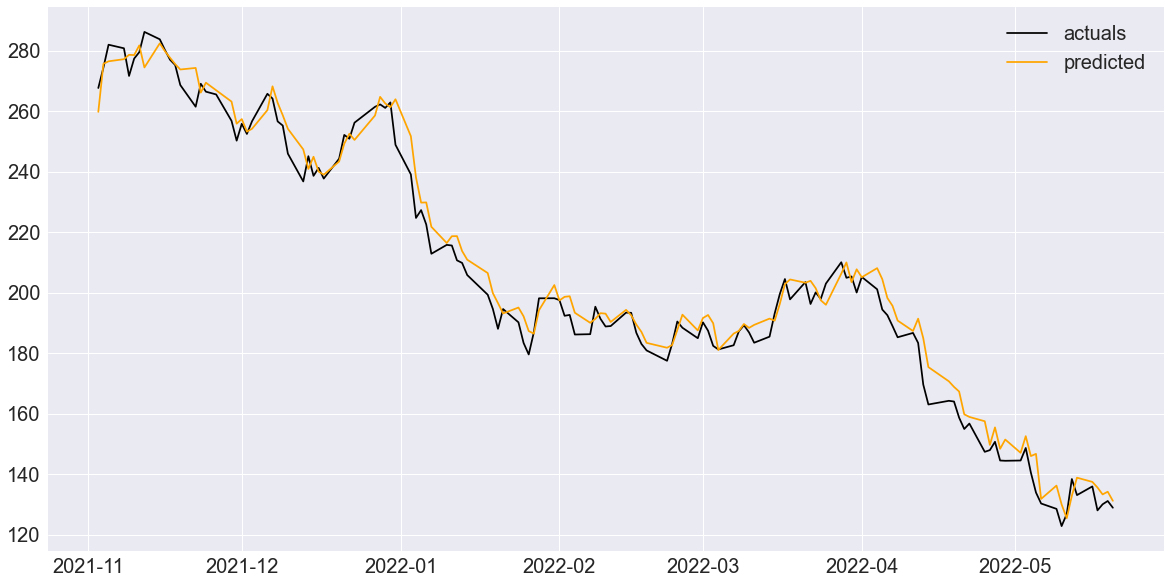

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['iipr_next_close'], color='black')
ax.plot(y_test2['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056       0.000        0.00      0.000   
2016-12-02             -0.1126       0.000        0.00      0.000   
2016-12-05             -0.1166       0.000        0.00      0.000   
2016-12-06             -0.0250       0.000        0.00      0.000   
2016-12-07              0.1781       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

1239

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

1239
138


In [112]:
X_train3 = train3.drop('iipr_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [113]:
X_train3.shape

(1239, 263)

In [114]:
y_train3 = train3['iipr_next_close']
y_train3.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-10-29    268.450012
2021-11-01    266.359985
2021-11-02    260.070007
Name: iipr_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('iipr_next_close', axis=1)
y_test3 = test3['iipr_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-03     11    3  2021        4     13.01    13.640   12.951      13.54   
2021-11-04     11    4  2021        4     13.59    13.649   13.080      13.26   
2021-11-05     11    5  2021        4     12.84    12.860   11.310      11.79   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-03     5074500           13.07           13.26      0.47     0.035960   
2021-11-04     5496300           13.54           11.79     -0.28    -0.020679   
2021-11-05    21973000           13.26           12.98     -1.47    -0.110860   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-03              13.096              0.152               13.242   
2021-11-04              13.150              0.054               13.164   
2021-11-05              12.982             -0.168               13.005   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-03              -0.057        7.99        8.02       7.75   
2021-11-04              -0.078        7.56        8.05       7.55   
2021-11-05              -0.159        7.72        8.52       7.61   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-03        8.020      584700.0              8.08             7.720   
2021-11-04        7.720      738500.0              8.02             8.426   
2021-11-05        8.426     1181400.0              7.72             8.950   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-03      -0.060      -0.007426                7.8800   
2021-11-04      -0.300      -0.037406                7.9240   
2021-11-05       0.706       0.091451                8.0492   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-03               0.0840                 7.8950               -0.0464   
2021-11-04               0.0440                 7.8470               -0.0480   
2021-11-05               0.1252                 7.8876                0.0406   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-03       5.31       5.66      5.30        5.52    2238700.0   
2021-11-04       5.56       5.62      5.39        5.41    2450000.0   
2021-11-05       5.39       5.39      5.11        5.34    4875000.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-03             5.36             5.41       0.16      0.029851   
2021-11-04             5.52             5.34      -0.11     -0.019928   
2021-11-05             5.41             6.71      -0.07     -0.012939   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-03                5.354               0.046                 5.470   
2021-11-04                5.380               0.026                 5.416   
2021-11-05                5.410               0.030                 5.385   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-03               -0.028        9.12        9.46       9.00   
2021-11-04               -0.054        9.45        9.66       

In [118]:
X_test3.shape

(138, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    130.119995
2022-05-19    131.210007
2022-05-20    128.990005
Name: iipr_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([258.80096061, 273.43127327, 277.75031763, 277.35594397,
       279.17737429])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

7.830000886522882


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

6.508825307888804


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['iipr_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['iipr_next_close'])

In [125]:
y_test3['iipr_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-16       136.029999            141.630126
2022-05-17       128.110001            144.322557
2022-05-18       130.119995            140.216966
2022-05-19       131.210007            142.783620
2022-05-20       128.990005            141.424123

In [127]:
hyper_table.append(dict(stock='iipr', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['iipr_next_close'][-1],
                        predicted_price=y_test3['iipr_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

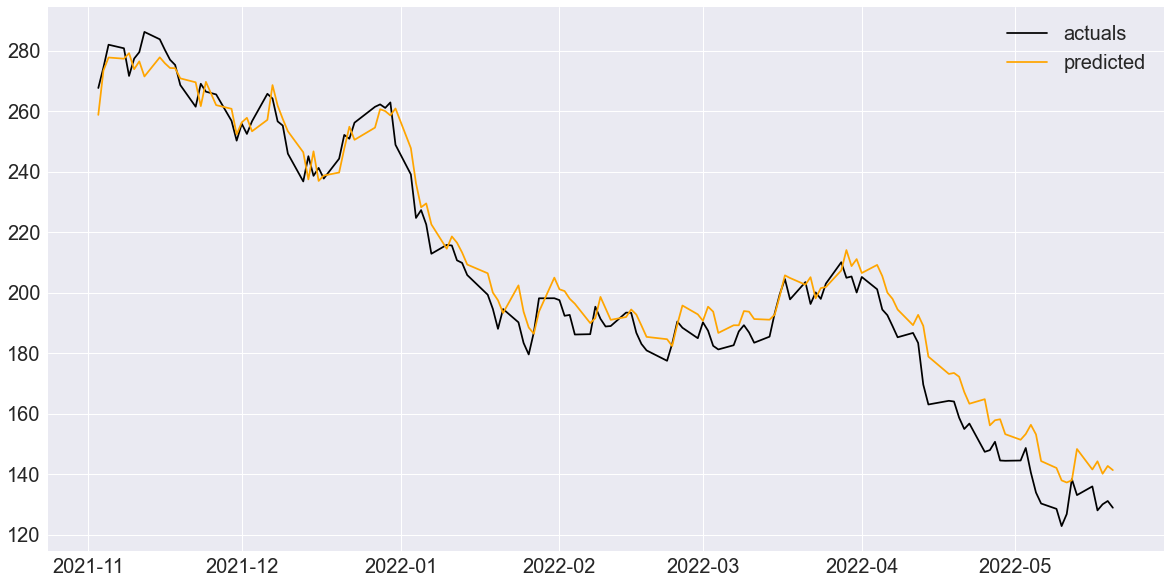

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['iipr_next_close'], color='black')
ax.plot(y_test3['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056       0.000        0.00      0.000   
2016-12-02             -0.1126       0.000        0.00      0.000   
2016-12-05             -0.1166       0.000        0.00      0.000   
2016-12-06             -0.0250       0.000        0.00      0.000   
2016-12-07              0.1781       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

1239

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

1239
138


In [142]:
X_train4 = train4.drop('iipr_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [143]:
X_train4.shape

(1239, 289)

In [144]:
y_train4 = train4['iipr_next_close']
y_train4.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-10-29    268.450012
2021-11-01    266.359985
2021-11-02    260.070007
Name: iipr_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('iipr_next_close', axis=1)
y_test4 = test4['iipr_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-03     11    3  2021        4     13.01    13.640   12.951      13.54   
2021-11-04     11    4  2021        4     13.59    13.649   13.080      13.26   
2021-11-05     11    5  2021        4     12.84    12.860   11.310      11.79   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-03     5074500           13.07           13.26      0.47     0.035960   
2021-11-04     5496300           13.54           11.79     -0.28    -0.020679   
2021-11-05    21973000           13.26           12.98     -1.47    -0.110860   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-03              13.096              0.152               13.242   
2021-11-04              13.150              0.054               13.164   
2021-11-05              12.982             -0.168               13.005   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-03              -0.057        7.99        8.02       7.75   
2021-11-04              -0.078        7.56        8.05       7.55   
2021-11-05              -0.159        7.72        8.52       7.61   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-03        8.020      584700.0              8.08             7.720   
2021-11-04        7.720      738500.0              8.02             8.426   
2021-11-05        8.426     1181400.0              7.72             8.950   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-03      -0.060      -0.007426                7.8800   
2021-11-04      -0.300      -0.037406                7.9240   
2021-11-05       0.706       0.091451                8.0492   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-03               0.0840                 7.8950               -0.0464   
2021-11-04               0.0440                 7.8470               -0.0480   
2021-11-05               0.1252                 7.8876                0.0406   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-03       5.31       5.66      5.30        5.52    2238700.0   
2021-11-04       5.56       5.62      5.39        5.41    2450000.0   
2021-11-05       5.39       5.39      5.11        5.34    4875000.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-03             5.36             5.41       0.16      0.029851   
2021-11-04             5.52             5.34      -0.11     -0.019928   
2021-11-05             5.41             6.71      -0.07     -0.012939   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-03                5.354               0.046                 5.470   
2021-11-04                5.380               0.026                 5.416   
2021-11-05                5.410               0.030                 5.385   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-03               -0.028        9.12        9.46       9.00   
2021-11-04               -0.054        9.45        9.66       

In [148]:
X_test4.shape

(138, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    130.119995
2022-05-19    131.210007
2022-05-20    128.990005
Name: iipr_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([258.62222981, 273.57079687, 275.47187895, 277.85690742,
       277.34675757])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

7.488967987852953


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

6.212998541246706


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['iipr_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['iipr_next_close'])

In [155]:
y_test4['iipr_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-16       136.029999            143.344439
2022-05-17       128.110001            140.722278
2022-05-18       130.119995            138.644147
2022-05-19       131.210007            142.560616
2022-05-20       128.990005            141.796277

In [157]:
hyper_table.append(dict(stock='iipr', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['iipr_next_close'][-1],
                        predicted_price=y_test4['iipr_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

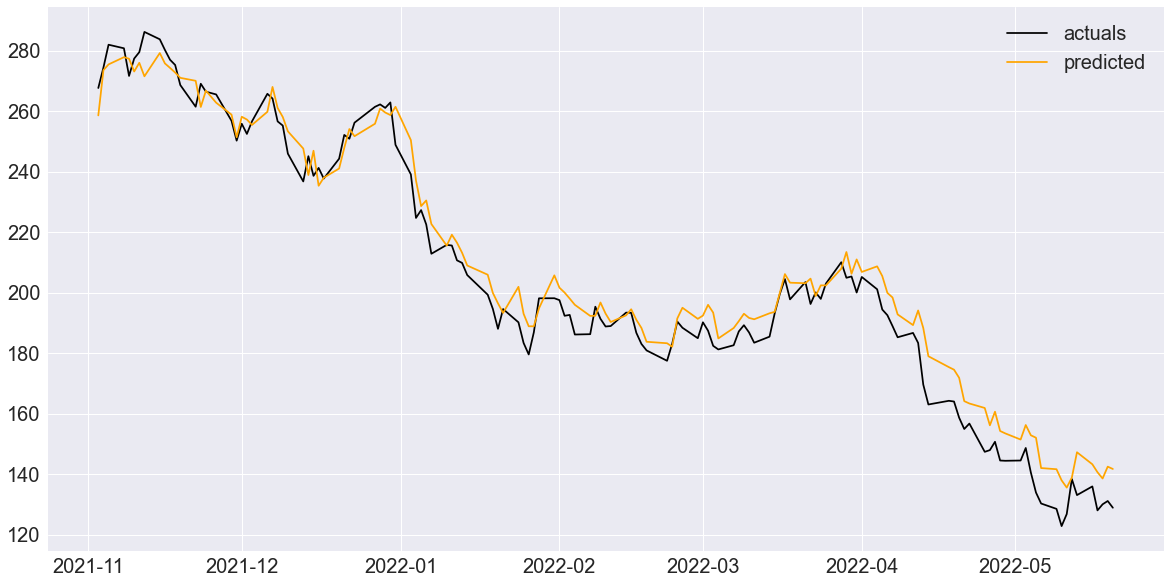

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['iipr_next_close'], color='black')
ax.plot(y_test4['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056       0.000        0.00      0.000   
2016-12-02             -0.1126       0.000        0.00      0.000   
2016-12-05             -0.1166       0.000        0.00      0.000   
2016-12-06             -0.0250       0.000        0.00      0.000   
2016-12-07              0.1781       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

1239

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

1239
138


In [172]:
X_train5 = train5.drop('iipr_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [173]:
X_train5.shape

(1239, 393)

In [174]:
y_train5 = train5['iipr_next_close']
y_train5.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-10-29    268.450012
2021-11-01    266.359985
2021-11-02    260.070007
Name: iipr_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('iipr_next_close', axis=1)
y_test5 = test5['iipr_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-03     11    3  2021        4     13.01    13.640   12.951      13.54   
2021-11-04     11    4  2021        4     13.59    13.649   13.080      13.26   
2021-11-05     11    5  2021        4     12.84    12.860   11.310      11.79   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-03     5074500           13.07           13.26      0.47     0.035960   
2021-11-04     5496300           13.54           11.79     -0.28    -0.020679   
2021-11-05    21973000           13.26           12.98     -1.47    -0.110860   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-03              13.096              0.152               13.242   
2021-11-04              13.150              0.054               13.164   
2021-11-05              12.982             -0.168               13.005   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-03              -0.057        7.99        8.02       7.75   
2021-11-04              -0.078        7.56        8.05       7.55   
2021-11-05              -0.159        7.72        8.52       7.61   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-03        8.020      584700.0              8.08             7.720   
2021-11-04        7.720      738500.0              8.02             8.426   
2021-11-05        8.426     1181400.0              7.72             8.950   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-03      -0.060      -0.007426                7.8800   
2021-11-04      -0.300      -0.037406                7.9240   
2021-11-05       0.706       0.091451                8.0492   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-03               0.0840                 7.8950               -0.0464   
2021-11-04               0.0440                 7.8470               -0.0480   
2021-11-05               0.1252                 7.8876                0.0406   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-03       5.31       5.66      5.30        5.52    2238700.0   
2021-11-04       5.56       5.62      5.39        5.41    2450000.0   
2021-11-05       5.39       5.39      5.11        5.34    4875000.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-03             5.36             5.41       0.16      0.029851   
2021-11-04             5.52             5.34      -0.11     -0.019928   
2021-11-05             5.41             6.71      -0.07     -0.012939   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-03                5.354               0.046                 5.470   
2021-11-04                5.380               0.026                 5.416   
2021-11-05                5.410               0.030                 5.385   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-03               -0.028        9.12        9.46       9.00   
2021-11-04               -0.054        9.45        9.66       

In [178]:
X_test5.shape

(138, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    130.119995
2022-05-19    131.210007
2022-05-20    128.990005
Name: iipr_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([258.61856768, 273.36683988, 277.40491329, 276.72378799,
       275.77804586])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

10.530702809687934


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

8.823111756424135


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['iipr_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['iipr_next_close'])

In [185]:
y_test5['iipr_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-16       136.029999            149.041249
2022-05-17       128.110001            152.441659
2022-05-18       130.119995            146.534861
2022-05-19       131.210007            148.778311
2022-05-20       128.990005            147.450463

In [187]:
hyper_table.append(dict(stock='iipr', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['iipr_next_close'][-1],
                        predicted_price=y_test5['iipr_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

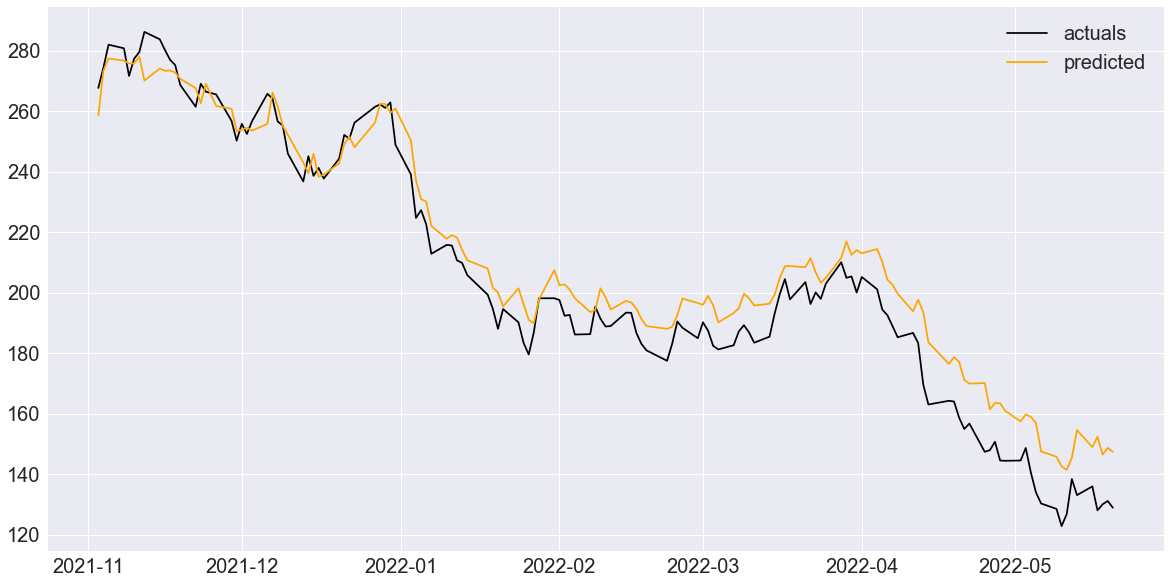

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['iipr_next_close'], color='black')
ax.plot(y_test5['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (IIPR target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   
2016-12-06     12    6  2016        4     8.021     8.150    7.360      7.549   
2016-12-07     12    7  2016        4     7.288     8.105    7.254      8.081   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   
2016-12-06      437700           8.130           8.081    -0.581    -0.071464   
2016-12-07      351600           7.549           7.573     0.532     0.070473   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   
2016-12-06              8.3152            -0.1682               8.0041   
2016-12-07              8.1754            -0.1398               8.1822   
...                        ...                ...                  ...   
2022-05-17              5.5780             0.0900               5.7590   
2022-05-18              5.7000             0.1220               5.6510   
2022-05-19              5.8000             0.1000               5.6310   
2022-05-20              5.7200            -0.0800               5.5860   
2022-05-23              5.6120            -0.1080               5.5500   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056       0.000        0.00      0.000   
2016-12-02             -0.1126       0.000        0.00      0.000   
2016-12-05             -0.1166       0.000        0.00      0.000   
2016-12-06             -0.0250       0.000        0.00      0.000   
2016-12-07              0.1781       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17             -0.0170       3.973        4.10      3.900   
2022-05-18             -0.1080       3.990        4.07      3.800   
2022-05-19             -0.0200       3.990        4.03      3.840   
2022-05-20             -0.0450       3.990        4.20      3.878   
2022-05-23             -0.0360       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

1239

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

1239
138


In [202]:
X_train6 = train6.drop('iipr_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2016-12-01     12    1  2016        4     8.950     9.325    8.337      8.556   
2016-12-02     12    2  2016        4     8.777     8.856    8.400      8.561   
2016-12-05     12    5  2016        4     8.420     8.480    8.013      8.130   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2016-12-01      660200           8.780           8.561    -0.224    -0.025513   
2016-12-02      257100           8.556           8.130     0.005     0.000584   
2016-12-05      214100           8.561           7.549    -0.431    -0.050345   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2016-12-01              8.3622             0.1732               8.2583   
2016-12-02              8.5234             0.1612               8.1457   
2016-12-05              8.4834            -0.0400               8.0291   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2016-12-01              0.0056         0.0         0.0        0.0   
2016-12-02             -0.1126         0.0         0.0        0.0   
2016-12-05             -0.1166         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2016-12-01          0.0           0.0               0.0               0.0   
2016-12-02          0.0           0.0               0.0               0.0   
2016-12-05          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2016-12-01         0.0            0.0                   0.0   
2016-12-02         0.0            0.0                   0.0   
2016-12-05         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2016-12-01                  0.0                    0.0                   0.0   
2016-12-02                  0.0                    0.0                   0.0   
2016-12-05                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2016-12-01        0.0        0.0       0.0         0.0          0.0   
2016-12-02        0.0        0.0       0.0         0.0          0.0   
2016-12-05        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2016-12-01              0.0              0.0        0.0           0.0   
2016-12-02              0.0              0.0        0.0           0.0   
2016-12-05              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2016-12-01                  0.0                 0.0                   0.0   
2016-12-02                  0.0                 0.0                   0.0   
2016-12-05                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2016-12-01                  0.0         0.0         0.0        0.0   
2016-12-02                  0.0         0.0         0.0       

In [203]:
X_train6.shape

(1239, 419)

In [204]:
y_train6 = train6['iipr_next_close']
y_train6.head(3)

Date
2016-12-01    18.450001
2016-12-02    15.400000
2016-12-05    16.650000
Name: iipr_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-10-29    268.450012
2021-11-01    266.359985
2021-11-02    260.070007
Name: iipr_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('iipr_next_close', axis=1)
y_test6 = test6['iipr_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2021-11-03     11    3  2021        4     13.01    13.640   12.951      13.54   
2021-11-04     11    4  2021        4     13.59    13.649   13.080      13.26   
2021-11-05     11    5  2021        4     12.84    12.860   11.310      11.79   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2021-11-03     5074500           13.07           13.26      0.47     0.035960   
2021-11-04     5496300           13.54           11.79     -0.28    -0.020679   
2021-11-05    21973000           13.26           12.98     -1.47    -0.110860   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-11-03              13.096              0.152               13.242   
2021-11-04              13.150              0.054               13.164   
2021-11-05              12.982             -0.168               13.005   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-11-03              -0.057        7.99        8.02       7.75   
2021-11-04              -0.078        7.56        8.05       7.55   
2021-11-05              -0.159        7.72        8.52       7.61   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-11-03        8.020      584700.0              8.08             7.720   
2021-11-04        7.720      738500.0              8.02             8.426   
2021-11-05        8.426     1181400.0              7.72             8.950   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-11-03      -0.060      -0.007426                7.8800   
2021-11-04      -0.300      -0.037406                7.9240   
2021-11-05       0.706       0.091451                8.0492   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-11-03               0.0840                 7.8950               -0.0464   
2021-11-04               0.0440                 7.8470               -0.0480   
2021-11-05               0.1252                 7.8876                0.0406   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-11-03       5.31       5.66      5.30        5.52    2238700.0   
2021-11-04       5.56       5.62      5.39        5.41    2450000.0   
2021-11-05       5.39       5.39      5.11        5.34    4875000.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-11-03             5.36             5.41       0.16      0.029851   
2021-11-04             5.52             5.34      -0.11     -0.019928   
2021-11-05             5.41             6.71      -0.07     -0.012939   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-11-03                5.354               0.046                 5.470   
2021-11-04                5.380               0.026                 5.416   
2021-11-05                5.410               0.030                 5.385   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-11-03               -0.028        9.12        9.46       9.00   
2021-11-04               -0.054        9.45        9.66       

In [208]:
X_test6.shape

(138, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    130.119995
2022-05-19    131.210007
2022-05-20    128.990005
Name: iipr_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([259.10467516, 273.96081392, 274.98762852, 275.73394833,
       274.91048534])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

9.886382737036786


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

8.369845234483877


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['iipr_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['iipr_next_close'])

In [215]:
y_test6['iipr_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

iipr_next_close  iipr_pred_next_close
Date                                             
2022-05-16       136.029999            148.693980
2022-05-17       128.110001            147.864652
2022-05-18       130.119995            143.591165
2022-05-19       131.210007            146.777123
2022-05-20       128.990005            145.048508

In [217]:
hyper_table.append(dict(stock='iipr', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['iipr_next_close'][-1],
                        predicted_price=y_test6['iipr_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

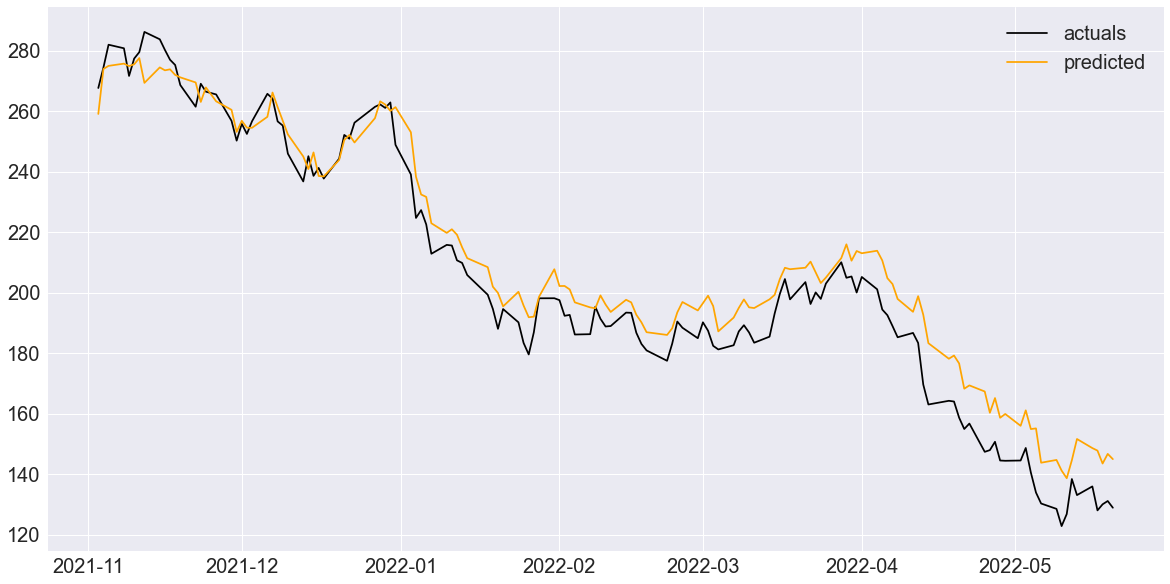

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['iipr_next_close'], color='black')
ax.plot(y_test6['iipr_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model       rmse       mae  actual_price  \
0  iipr         1+Dow  LinearRegression()   5.107221  4.160234    128.990005   
2  iipr    1+ETFs+Dow  LinearRegression()   5.658126  4.541939    128.990005   
1  iipr        1+ETFs  LinearRegression()   5.676928  4.602045    128.990005   
4  iipr       All+Dow  LinearRegression()   7.488968  6.212999    128.990005   
3  iipr    All stocks  LinearRegression()   7.830001  6.508825    128.990005   
6  iipr  All+ETFs+Dow  LinearRegression()   9.886383  8.369845    128.990005   
5  iipr      All+ETFs  LinearRegression()  10.530703  8.823112    128.990005   

   predicted_price  rows  train_rows  test_rows  columns  
0       134.334104  1377        1239        138       56  
2       131.276927  1377        1239        138      186  
1       130.806100  1377        1239        138      160  
4       141.796277  1377        1239        138      290  
3       141.424123  1377        1239        138      264  
6       145.048508  1377        1239        138      420  
5       147.450463  1377        1239        138      394

In [220]:
hyper_table_iipr = hyper_table.head(1)
hyper_table_iipr

stock version               model      rmse       mae  actual_price  \
0  iipr   1+Dow  LinearRegression()  5.107221  4.160234    128.990005   

   predicted_price  rows  train_rows  test_rows  columns  
0       134.334104  1377        1239        138       56

In [221]:
hyper_table_iipr.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_iipr.csv', index=True)

## Simulation - Sell

In [222]:
iipr_sim = df0[n:]
iipr_sim = iipr_sim[['iipr_Open', 'iipr_Close']]
iipr_sim.head()

iipr_Open  iipr_Close
Date                              
2021-11-03  268.000000  260.070007
2021-11-04  264.970001  267.679993
2021-11-05  270.850006  274.420013
2021-11-08  275.380005  281.980011
2021-11-09  280.859985  280.799988

In [223]:
iipr_sim.shape

(138, 2)

In [224]:
iipr_sim.tail()

iipr_Open  iipr_Close
Date                              
2022-05-16  138.500000  133.160004
2022-05-17  134.919998  136.029999
2022-05-18  133.449997  128.110001
2022-05-19  128.110001  130.119995
2022-05-20  131.949997  131.210007

In [225]:
iipr_sim['iipr_Pred_Close'] = y_pred0
iipr_sim.head()

iipr_Open  iipr_Close  iipr_Pred_Close
Date                                               
2021-11-03  268.000000  260.070007       259.836582
2021-11-04  264.970001  267.679993       269.341432
2021-11-05  270.850006  274.420013       274.554107
2021-11-08  275.380005  281.980011       281.423128
2021-11-09  280.859985  280.799988       279.494758

In [226]:
iipr_sim['Trade'] = iipr_sim['iipr_Pred_Close'] > iipr_sim['iipr_Open']
iipr_sim.head()

iipr_Open  iipr_Close  iipr_Pred_Close  Trade
Date                                                      
2021-11-03  268.000000  260.070007       259.836582  False
2021-11-04  264.970001  267.679993       269.341432   True
2021-11-05  270.850006  274.420013       274.554107   True
2021-11-08  275.380005  281.980011       281.423128   True
2021-11-09  280.859985  280.799988       279.494758  False

In [227]:
iipr_sim = iipr_sim[iipr_sim['Trade']==True]
iipr_sim.head()

iipr_Open  iipr_Close  iipr_Pred_Close  Trade
Date                                                      
2021-11-04  264.970001  267.679993       269.341432   True
2021-11-05  270.850006  274.420013       274.554107   True
2021-11-08  275.380005  281.980011       281.423128   True
2021-11-11  272.750000  277.399994       277.978260   True
2021-11-12  279.059998  279.519989       279.080492   True

In [228]:
iipr_sim['Gains'] = (iipr_sim['iipr_Close'] - iipr_sim['iipr_Open'])*100
iipr_sim.head()

iipr_Open  iipr_Close  iipr_Pred_Close  Trade     Gains
Date                                                                
2021-11-04  264.970001  267.679993       269.341432   True  270.9992
2021-11-05  270.850006  274.420013       274.554107   True  357.0007
2021-11-08  275.380005  281.980011       281.423128   True  660.0006
2021-11-11  272.750000  277.399994       277.978260   True  464.9994
2021-11-12  279.059998  279.519989       279.080492   True   45.9991

In [229]:
total_gains = iipr_sim['Gains'].sum()
print(round(total_gains, 2))

22335.0
